## Problem2

When a person applies for a loan, there are two types of decisions that could be taken by the company: 

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below: 
o Fully paid: Applicant has fully paid the loan (the principal and the interest rate) 
o Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. 
o Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan  
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through an online interface.  
 Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.  
 If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.  

Perform Multinomial regression on the dataset in which loan_status is the output (Y) variable and it has three levels in it. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('loan.csv',encoding = "ISO-8859-1",low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.drop(['id','member_id'],axis=1,inplace=True)

In [5]:
df.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 109, dtype: object

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
df.describe()

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_6056/1238104784.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000

In [7]:
df.shape

(39717, 109)

In [8]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=109)

In [9]:
df.dtypes

loan_amnt                     int64  
funded_amnt                   int64  
funded_amnt_inv               float64
term                          object 
int_rate                      object 
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 109, dtype: object

In [10]:
df.describe(exclude = ["number"])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39667,39717,39646,1140,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,1,39717,26527,14,19615,823,50,526,1089,1,101,2,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,Jun-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,39717,1,210,18641,2184,597,7099,370,977,39717,1256,1125,10308,39717


In [11]:
from sklearn.feature_selection import VarianceThreshold
# defining the function VT
#VT = VarianceThreshold()
#Fit the function VT and transform, and saving it in X_num
#X_num = VT.fit_transform(df)

In [12]:
#zero variance
df.drop(['pymnt_plan','initial_list_status','application_type','grade','url','desc'],axis=1,inplace=True)

In [13]:
#df.drop(['desc'],axis=1,inplace=True)

In [14]:
df.shape

(39717, 103)

In [15]:
#df.select_dtypes(include=["object"])
df.describe(exclude = ["number"])

,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39706,39717,39717,39717,39667,39646,1140,39715
unique,2,371,35,28820,11,5,3,55,3,14,19615,823,50,526,1089,101,2,106
top,36 months,10.99%,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,May-16,Jun-16,May-16
freq,29096,956,2917,134,8879,18899,16921,2260,32950,18641,2184,597,7099,370,977,1256,1125,10308


In [16]:
from sklearn.preprocessing import LabelEncoder
# define one hot encoding
encoder = LabelEncoder()
# transform data
df['term']= encoder.fit_transform(df.term)
df['int_rate']= encoder.fit_transform(df.int_rate)
df['sub_grade']= encoder.fit_transform(df.sub_grade)
df['emp_title']= encoder.fit_transform(df.emp_title)
df['emp_length']= encoder.fit_transform(df.emp_length)
df['home_ownership']= encoder.fit_transform(df.home_ownership)
df['verification_status']= encoder.fit_transform(df.verification_status)
df['issue_d']= encoder.fit_transform(df.issue_d)
df['purpose']= encoder.fit_transform(df.purpose)
df['title']= encoder.fit_transform(df.title)
df['zip_code']= encoder.fit_transform(df.zip_code)
df['addr_state']= encoder.fit_transform(df.addr_state)
df['earliest_cr_line']= encoder.fit_transform(df.earliest_cr_line)
df['revol_util']= encoder.fit_transform(df.revol_util)
df['last_pymnt_d']= encoder.fit_transform(df.last_pymnt_d)
df['next_pymnt_d']= encoder.fit_transform(df.next_pymnt_d)
df['last_credit_pull_d']= encoder.fit_transform(df.last_credit_pull_d)

In [17]:
df['loan_status'] = df['loan_status'].replace(['Fully Paid','Charged Off','Current'],[0,1,2])

In [18]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,5000,4975.0,0,17,162.87,6,28820,1,4,24000.0,2,13,0,1,2958,713,3,27.65,0,200,1,NaN,NaN,3,0,13648,913,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,41,171.62,2,80,0.0,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,1,158,59.83,13,18995,10,4,30000.0,1,13,1,0,16197,277,10,1.00,0,42,5,NaN,NaN,3,0,1687,982,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,2,103,0.0,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,0,175,84.33,14,28820,1,4,12252.0,0,13,0,11,18885,502,14,8.72,0,387,2,NaN,NaN,2,0,2956,1074,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,57,649.91,2,80,0.0,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,0,99,339.31,10,331,1,4,49200.0,1,13,0,9,18778,749,4,20.00,0,169,1,35.0,NaN,10,0,5598,166,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,41,357.48,2,7,0.0,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,1,74,67.79,9,23683,0,4,80000.0,1,13,2,9,12357,798,36,17.94,0,211,0,38.0,NaN,15,0,27783,565,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,76,67.79,1,80,0.0,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
df.dtypes

loan_amnt                     int64  
funded_amnt                   int64  
funded_amnt_inv               float64
term                          int32  
int_rate                      int32  
                              ...    
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 103, dtype: object

In [20]:
df[df.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


<AxesSubplot:>

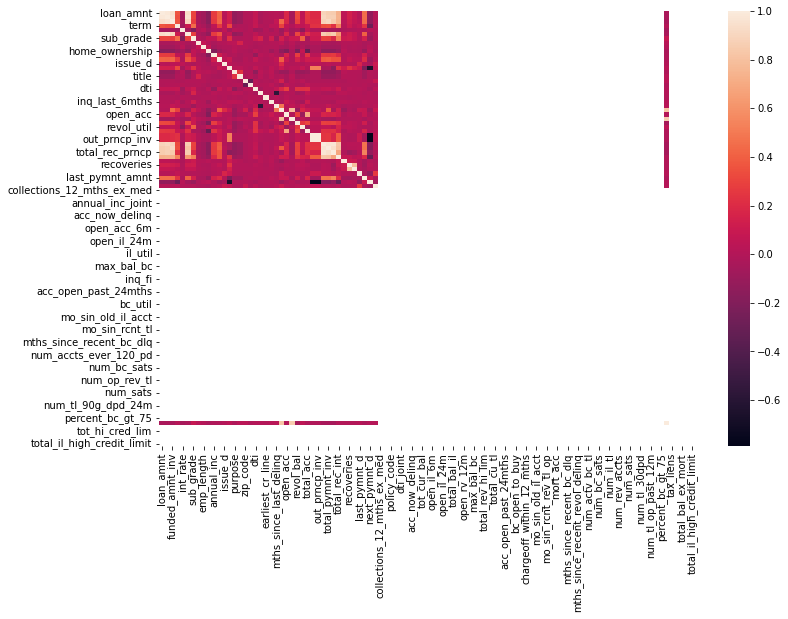

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.heatmap(df.corr(), annot=False)

In [22]:
#Get only highly correlated items
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df1 = df.corr().abs().round(1)
df1 = df.corr().round(1)
for column in df1:
    ac = df1[column].round(1)
    replace_col = df1[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df1.at[replace_col, column]='blah'

df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.0,1.0,0.9,blah,blah,0.9,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,0.9,0.9,0.9,0.7,blah,blah,blah,blah,blah,blah,blah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blah,NaN,NaN,NaN,NaN,NaN
funded_amnt,1.0,1.0,1.0,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,0.9,0.9,0.9,0.7,blah,blah,blah,blah,0.5,blah,blah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blah,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.9,1.0,1.0,blah,blah,0.9,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,0.9,0.9,0.8,0.7,blah,blah,blah,blah,blah,blah,blah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blah,NaN,NaN,NaN,NaN,NaN
term,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,0.5,blah,blah,blah,blah,blah,blah,blah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blah,NaN,NaN,NaN,NaN,NaN
int_rate,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blah,NaN,NaN,NaN,NaN,NaN
installment,0.9,1.0,0.9,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,0.9,0.8,0.9,0.6,blah,blah,blah,blah,

In [23]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

to_drop

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp']

In [24]:
#df.drop('funded_amnt', axis=1, inplace=True)
#df.drop('funded_amnt_inv', axis=1, inplace=True)
#df.drop('installment', axis=1, inplace=True)
#df.drop('out_prncp_inv', axis=1, inplace=True)
#df.drop('total_pymnt_inv', axis=1, inplace=True)
#df.drop('total_rec_prncp', axis=1, inplace=True)

In [25]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

to_drop

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [26]:
df.num_actv_rev_tl.nunique()

0

In [27]:
df.isnull().sum()

loan_amnt                         0    
term                              0    
int_rate                          0    
sub_grade                         0    
emp_title                         0    
emp_length                        0    
home_ownership                    0    
annual_inc                        0    
verification_status               0    
issue_d                           0    
loan_status                       0    
purpose                           0    
title                             0    
zip_code                          0    
addr_state                        0    
dti                               0    
delinq_2yrs                       0    
earliest_cr_line                  0    
inq_last_6mths                    0    
mths_since_last_delinq            25682
mths_since_last_record            36931
open_acc                          0    
pub_rec                           0    
revol_bal                         0    
revol_util                        0    


In [28]:
df.dropna(how='all',inplace=True,axis=1)

In [29]:
df.isnull().sum()

loan_amnt                     0    
term                          0    
int_rate                      0    
sub_grade                     0    
emp_title                     0    
emp_length                    0    
home_ownership                0    
annual_inc                    0    
verification_status           0    
issue_d                       0    
loan_status                   0    
purpose                       0    
title                         0    
zip_code                      0    
addr_state                    0    
dti                           0    
delinq_2yrs                   0    
earliest_cr_line              0    
inq_last_6mths                0    
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                      0    
pub_rec                       0    
revol_bal                     0    
revol_util                    0    
total_acc                     0    
out_prncp                     0    
total_rec_int               

In [30]:
df.drop(['mths_since_last_delinq','mths_since_last_record'], axis=1, inplace=True)

In [31]:
# impute missing values with median
median_collections_12_mths_ex_med = df['collections_12_mths_ex_med'].median()
median_chargeoff_within_12_mths = df['chargeoff_within_12_mths'].median()
median_pub_rec_bankruptcies = df['pub_rec_bankruptcies'].median()
median_tax_liens = df['tax_liens'].median()

df['collections_12_mths_ex_med_Median'] = df['collections_12_mths_ex_med'].fillna(median_collections_12_mths_ex_med)
df['chargeoff_within_12_mths_Median'] = df['chargeoff_within_12_mths'].fillna(median_collections_12_mths_ex_med)
df['pub_rec_bankruptcies_Median'] = df['pub_rec_bankruptcies'].fillna(median_collections_12_mths_ex_med)
df['tax_liens_Median'] = df['tax_liens'].fillna(median_collections_12_mths_ex_med)

df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens'], axis=1, inplace=True)

In [32]:
df.isnull().sum()

loan_amnt                            0
term                                 0
int_rate                             0
sub_grade                            0
emp_title                            0
emp_length                           0
home_ownership                       0
annual_inc                           0
verification_status                  0
issue_d                              0
loan_status                          0
purpose                              0
title                                0
zip_code                             0
addr_state                           0
dti                                  0
delinq_2yrs                          0
earliest_cr_line                     0
inq_last_6mths                       0
open_acc                             0
pub_rec                              0
revol_bal                            0
revol_util                           0
total_acc                            0
out_prncp                            0
total_rec_int            

In [33]:
# Sctter plot and histogram between variables
#sns.pairplot(df) # no multicolinearity issue

## Train Test split

In [34]:
X=df[df.columns.drop('loan_status')] ## independent features
y=df['loan_status'] ## dependent features

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train.shape

(31773, 39)

In [37]:
X_test.shape

(7944, 39)

In [38]:
y_test.shape

(7944,)

## Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
X_train_scaled .shape

(31773, 39)

## Multinomial Regression


In [44]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', C=1)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.908 (0.004)


In [43]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', C=1)
X_test_scaled = scaler.fit_transform(X_test)
results = model.fit(X_test_scaled,y_test)
# predicting the test set results
y_pred = model.predict(X_test_scaled)
score  = accuracy_score(y_test,y_pred)
print('test accuracy = ' ,score)

test accuracy =  0.9003021148036254


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[6474   63    0]
 [ 729  448    0]
 [   0    0  230]]


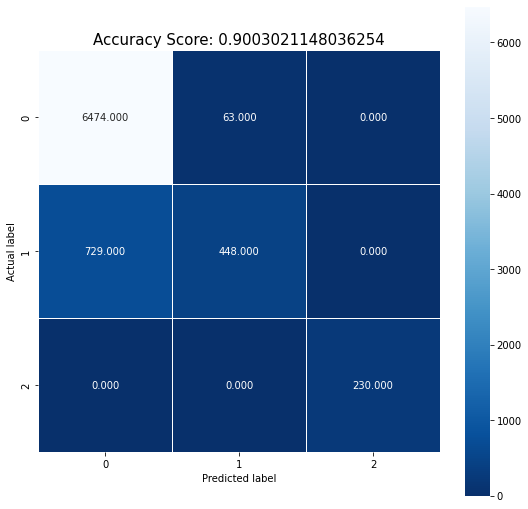

In [47]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);